# HW #4: Data Analysis of Building Energy Benchmarking Data
### Course: DATA 601
### Instructor: Syed Tauhid Ullah Shah

### Objective:

The purpose of this HW is to perform an in-depth analysis of the City of Calgary’s Building Energy
Benchmarking dataset. Students will use Python, Regular Expressions (Regex), Pandas (for
minimal tabular operations), NumPy, and Matplotlib to preprocess, analyze, and visualize the
data. The assignment requires cleaning the dataset, extracting relevant data using Regex,
performing aggregations, detecting outliers, and conducting exploratory visualizations.

### Submission Format:
• Jupyter Notebook (.ipynb) containing all code, analysis, and visualizations.
• A structured report (.pdf or .md) summarizing key findings, trends, and insights.
• Submit the GitHub repository link in the D2L report along with the Jupyter Notebook.
• Clearly document in the README.md how Regex was used for data extraction and
cleaning.
• The repository must include:
o A well-organized folder structure.
o A README.md with clear explanations of methodology, challenges faced, and
insights gained.
o Proper version control with meaningful commit messages.

In [65]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from tabulate import tabulate
from scipy.stats import ttest_ind
pd.__version__

'2.2.2'

## Part 1: Data Cleaning and Preprocessing
### 1.1 Load and Inspect the Dataset
• Load the dataset and display its shape, column names, and data types.

• Identify and list the number of missing values in each column.

In [67]:
# load data
df = pd.read_csv('/Users/anithajoseph/Documents/UofC/DATA601/Assignments/Assign4/Building_Energy_Benchmarking.csv')

print("----------------------------------------------------------------------------")
print("\033[1m"+"Data Analysis and Visualization of Building Emergency Benchmarking"+"\033[0m")
print("----------------------------------------------------------------------------")

#display shape, columns, and data types
print("1.\tShape of the Dataset:", df.shape)
print("2.\tNumber of records or rows of the DataFrame:", df.shape[0])
print("3.\tColumns in the Dataset:\n\t", df.columns)
print("4.\tData types of each column:\n", df.dtypes)

----------------------------------------------------------------------------
Data Analysis and Visualization of Building Emergency Benchmarking
----------------------------------------------------------------------------
1.	Shape of the Dataset: (494, 31)
2.	Number of records or rows of the DataFrame: 494
3.	Columns in the Dataset:
	 Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'ENERGY STAR Score',
       'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)',
       'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)',
       'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
       'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (M

In [68]:
# Inspect data
missingDataSum = df.isna().sum()
missingDataPercentage = (df.isnull().mean() * 100).round(2)
missingData = pd.DataFrame({
    "Missing Count": missingDataSum,
    "Missing Percentage": missingDataPercentage
})

print("\n\033[1m"+"Missing Count per column:"+"\033[0m")
print(tabulate(missingData, headers='keys', tablefmt='fancy_grid'))


Missing Count per column:
╒═══════════════════════════════════════════════════════════════════════╤═════════════════╤══════════════════════╕
│                                                                       │   Missing Count │   Missing Percentage │
╞═══════════════════════════════════════════════════════════════════════╪═════════════════╪══════════════════════╡
│ Property Id                                                           │               0 │                 0    │
├───────────────────────────────────────────────────────────────────────┼─────────────────┼──────────────────────┤
│ Property Name                                                         │               0 │                 0    │
├───────────────────────────────────────────────────────────────────────┼─────────────────┼──────────────────────┤
│ Address 1                                                             │               0 │                 0    │
├────────────────────────────────────────────────────

### 1.2 Handling Missing Data
• Drop columns with more than 40% missing values.

• For numerical columns, fill missing values with the median of their respective column.

• For categorical columns, fill missing values with the mode of their respective column.

In [70]:
columnNameDropped = missingDataPercentage[missingDataPercentage >= 40].index.tolist()
print("Columns with missing percentage more than 40% missing values are:\n", columnNameDropped)
originalDF =df

#Drop columns with missing percentage >40%
df = df.drop(columns = missingDataPercentage[missingDataPercentage > 40].index)

missingDataSum = df.isna().sum()
missingDataPercentage = (df.isnull().mean() * 100).round(2)
missingData = pd.DataFrame({
    "Missing Count": missingDataSum,
    "Missing Percentage": missingDataPercentage
})

print("\n\033[1m"+"Missing Count per column after dropping columns:"+"\033[0m")
print(tabulate(missingData, headers='keys', tablefmt='fancy_grid'))

Columns with missing percentage more than 40% missing values are:
 ['ENERGY STAR Score', 'District Hot Water Use (GJ)', 'Electricity Use – Generated from Onsite Renewable Systems (kWh)', 'Green Power - Onsite and Offsite (kWh)', 'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)']

Missing Count per column after dropping columns:
╒════════════════════════════════════════════╤═════════════════╤══════════════════════╕
│                                            │   Missing Count │   Missing Percentage │
╞════════════════════════════════════════════╪═════════════════╪══════════════════════╡
│ Property Id                                │               0 │                 0    │
├────────────────────────────────────────────┼─────────────────┼──────────────────────┤
│ Property Name                              │               0 │                 0    │
├────────────────────────────────────────────┼─────────────────┼──────────────────────┤
│ Address 1                     

In [71]:
#For numerical columns, fill missing values with the median of their respective column.
numericalColumns = df.select_dtypes(include=[np.number]).columns
print("\033[1m"+"Numerical Columns with Median are:"+"\033[0m")
medians = []
# Impute missing values in numerical columns using the median
for col in numericalColumns:
    median = df[col].median()
    medians.append(float(median))
    df.loc[df[col].isnull(), col] = median

numericalCols = pd.DataFrame({"Numerical Columns": numericalColumns,"Median":medians})
print(tabulate(numericalCols, headers='keys', tablefmt='fancy_grid'))

# For categorical columns, fill missing values with the mode of their respective column.
categoricalColumns = df.select_dtypes(exclude=[np.number]).columns
print("\033[1m"+"Categorical Columns with Mode are:"+"\033[0m")
modes = []
# Impute missing values in categorical columns using the mode
for col in categoricalColumns:
    mode = df[col].mode()[0]
    modes.append(mode)
    df.loc[df[col].isnull(), col] = mode

categoricalCols = pd.DataFrame({"Categorical Columns":categoricalColumns,"Mode":modes})
print(tabulate(categoricalCols, headers='keys', tablefmt='fancy_grid'))

missingDataSum = df.isna().sum()
missingDataPercentage = (df.isnull().mean() * 100).round(2)
missingData = pd.DataFrame({
    "Missing Count": missingDataSum,
    "Missing Percentage": missingDataPercentage
})

print("\n\033[1m"+"Missing Count per column after dropping columns:"+"\033[0m")
print(tabulate(missingData, headers='keys', tablefmt='fancy_grid'))  

Numerical Columns with Median are:
╒════╤════════════════════════════════════════════╤════════════════╕
│    │ Numerical Columns                          │         Median │
╞════╪════════════════════════════════════════════╪════════════════╡
│  0 │ Property Id                                │    9.99779e+06 │
├────┼────────────────────────────────────────────┼────────────────┤
│  1 │ Number of Buildings                        │    1           │
├────┼────────────────────────────────────────────┼────────────────┤
│  2 │ Year Built                                 │ 1978           │
├────┼────────────────────────────────────────────┼────────────────┤
│  3 │ Site EUI (GJ/m²)                           │    1.29        │
├────┼────────────────────────────────────────────┼────────────────┤
│  4 │ Weather Normalized Site EUI (GJ/m²)        │    1.31        │
├────┼────────────────────────────────────────────┼────────────────┤
│  5 │ Source EUI (GJ/m²)                         │    1.68        │

### 1.3 Extracting and Cleaning Data Using Regex
• Use Regex only to:

o Extract numeric values from text-based numeric columns (e.g., Property GFA, Energy Use, Emissions).

o Standardize Postal Codes to follow the Canadian format (A1A 1A1).

o Clean and extract meaningful text from Property Names and Addresses.

o Ensure extracted values are properly converted to numerical types for analysis.

In [73]:
#Extract numeric values from text-based numeric columns (e.g., Property GFA, Energy Use, Emissions).
def isNumeric(value):
    pattern = r'^-?\d+(\.\d+)?$'
    value = str(value).replace(',', '')
    return bool(re.match(pattern, str(value)))

def checkIfNumeric(df, column_name):
    return df[column_name].apply(isNumeric).all()
cols =[]
for column in df.select_dtypes(include=['object']).columns:
    if checkIfNumeric(df, column):
        df[column] = df[column].astype(str).str.replace(',', '').astype(float)
        cols.append(column)
        #print(f"Column '{column}' is numeric")
print("\n\033[1m"+"Extracted numerical values for the below columns:"+"\033[0m")
display(cols)


Extracted numerical values for the below columns:


['Property GFA - Self-Reported (m²)',
 'Site Energy Use (GJ)',
 'Weather Normalized Site Energy Use (GJ)',
 'Source Energy Use (GJ)',
 'Weather Normalized Source Energy Use (GJ)',
 'Total GHG Emissions (Metric Tons CO2e)',
 'Direct GHG Emissions (Metric Tons CO2e)',
 'Electricity Use - Grid Purchase (kWh)',
 'Natural Gas Use (GJ)']

In [74]:
#Standardize Postal Codes to follow the Canadian format (A1A 1A1)
pattern = r'^[A-Za-z]\d[A-Za-z][ ]?\d[A-Za-z]\d$'
postCode = 'Postal Code'

def standardizePostalCode(postalCode):
    if re.match(pattern, postalCode):
        return postalCode[:3] + ' ' + postalCode[3:]
    return postalCode
    
df[postCode] = df[postCode].apply(standardizePostalCode)
df[postCode] = df[postCode].str.upper().str.replace(' ', '').apply(lambda x: x[:3] + ' ' + x[3:] if re.match(pattern, x) else x)

#Invalid Postal codes
print("\n\033[1m"+"Invalid postal codes:"+"\033[0m")
matching_values = df[~df[postCode].str.match(pattern, na=False)]
display(matching_values)

df[postCode] = df[postCode].apply(lambda x: x if re.match(pattern, x) else 'T2A 0K9')
print("\nAbove invalid are modified to T2A 0K9\n")


Invalid postal codes:


,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
7,9481172,Bob Bohan Aquatic and Fitness Centre,4812 14 Av SE,Calgary,T2AOK9,Alberta,Heated Swimming Pool,1,1976,1641.0,...,6.22,6.53,674.0,410.7,304.0,185.0,597416.0,5914.0,2023,2023-9481172
195,9481172,Bob Bohan Aquatic and Fitness Centre,4812 14 Av SE,Calgary,T2AOK9,Alberta,Heated Swimming Pool,1,1976,1641.2,...,5.76,5.85,645.2,393.1,297.7,181.4,510978.1,5798.3,2020,2020-9481172
324,9481172,Bob Bohan Aquatic and Fitness Centre,4812 14 Av SE,Calgary,T2AOK9,Alberta,Heated Swimming Pool,1,1976,1641.2,...,6.35,6.48,701.7,427.6,338.1,206.0,534804.4,6583.4,2021,2021-9481172



Above invalid are modified to T2A 0K9



In [75]:
#Clean and extract meaningful text from Property Names and Addresses.
df['Property Name'] = df['Property Name'].str.strip()
df['Address 1'] = df['Address 1'].str.strip()
df['Address 1'] = df['Address 1'].str.replace(r'\b([Ss][Tt])\b', 'Street', regex=True)
df['Address 1'] = df['Address 1'].str.replace(r'\b(AV|av|Av|aV|AVE|ave)\b', 'Avenue', regex=True)
df['Address 1'] = df['Address 1'].str.replace(r'\b([Rr][Dd])\b', 'Road', regex=True)
df['Address 1'] = df['Address 1'].str.replace(r'\b([Dd][Rr])\b', 'Drive', regex=True)

#display(df['Address 1'])
print("Property Name and Address columns are modified") 

Property Name and Address columns are modified


## Part 2: Exploratory Data Analysis (EDA) and Aggregations
### 2.1 Statistical Summary

• Generate summary statistics for numerical features using extracted data.

• Identify and explain key observations (e.g., outliers, mean vs. median differences).

In [77]:
numericalCols = df.select_dtypes(include=['number'])
excludeCols = ['Property Id', 'Year Built', 'Year Ending']
numericalCols = numericalCols.drop(columns=excludeCols)


#calculate Mean And Median
def calculateMeanAndMedian(column):
    meanValue = column.mean().round(2)
    medianValue = column.median()
    return meanValue, medianValue

i = 0
meanMediandf = pd.DataFrame(columns=['Column Name', 'Mean', 'Median'])
for col in numericalCols:
    meanValue, medianValue = calculateMeanAndMedian(df[col])
    meanMediandf.loc[i] = col , meanValue, medianValue
    i += 1
display(meanMediandf)

print("\n\033[1m"+"Summary Statistics for all numerical columns:"+"\033[0m")
summaryStatistics = numericalCols.describe()
display(summaryStatistics)  

def calculateOutlier(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    outliers = column[(column < lowerBound) | (column > upperBound)]
    return outliers

def calculateZScore(column):
    mean = column.mean()
    std = column.std()
    zScores = (column - mean) / std
    outliers = column[(zScores > 3) | (zScores < -3)]
    return outliers


for col in numericalCols:
    outlier = calculateOutlier(df[col])
    zScore = calculateZScore(df[col])
    statistics = {
        'Outlier': outlier,
        'ZScore': zScore
    }
    statistics = pd.DataFrame(statistics)
    print(f"Statistical Summary for column: {col}")
    print("----------------------------------------------------------")
    print(f"Oulier count: {outlier.count()}\t ZScore count: {zScore.count()}")
    #display(statistics)

buildingCountByPropertyType = df.groupby(['Primary Property Type - Self Selected'])['Number of Buildings'].sum()
display(buildingCountByPropertyType)
yearAndBuildingCount =  df.groupby(['Year Built'])['Number of Buildings'].sum()
display(yearAndBuildingCount)

,Column Name,Mean,Median
0,Number of Buildings,1.06,1.00
1,Property GFA - Self-Reported (m²),4752.56,1806.75
2,Site Energy Use (GJ),8265.67,2555.65
3,Weather Normalized Site Energy Use (GJ),8397.19,2572.50
4,Site EUI (GJ/m²),1.77,1.29
5,Weather Normalized Site EUI (GJ/m²),1.81,1.31
6,Source Energy Use (GJ),10590.53,3238.60
7,Weather Normalized Source Energy Use (GJ),10212.80,3127.50
8,Source EUI (GJ/m²),2.28,1.68
9,Weather Normalized Source EUI (GJ/m²),2.32,1.69



Summary Statistics for all numerical columns:


,Number of Buildings,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Weather Normalized Site Energy Use (GJ),Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source Energy Use (GJ),Weather Normalized Source Energy Use (GJ),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ)
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000
mean,1.060729,4752.556883,8265.670040,8397.193117,1.774798,1.810324,10590.527733,10212.804049,2.282753,2.319717,724.276316,158.671660,281.868826,63.821862,6.011028e+05,5509.848381
std,0.278281,10128.320688,19733.748811,19877.336939,1.306700,1.331529,23438.866328,22869.729340,1.597846,1.622897,1490.433401,109.472637,884.613506,56.835735,1.184414e+06,17221.116059
min,1.000000,113.000000,141.000000,146.000000,0.060000,0.060000,237.000000,146.000000,0.110000,0.110000,15.000000,10.200000,0.000000,0.000000,1.076580e+04,3.000000
25%,1.000000,1096.650000,1232.825000,1256.150000,0.990000,1.000000,1601.525000,1557.250000,1.312500,1.350000,113.850000,93.100000,43.000000,33.325000,1.074446e+05,861.050000
50%,1.000000,1806.750000,2555.650000,2572.500000,1.290000,1.310000,3238.600000,3127.500000,1.680000,1.690000,228.400000,117.600000,78.700000,43.900000,2.237719e+05,1532.400000
75%,1.000000,4257.900000,7999.050000,8006.575000,2.065000,2.110000,10242.400000,9637.275000,2.622500,2.652500,696.550000,186.975000,247.425000,74.050000,5.492725e+05,4816.200000
max,3.000000,85941.000000,243202.000000,242611.000000,8.430000,8.360000,261481.000000,260399.000000,10.130000,10.060000,13067.000000,666.200000,12243.000000,386.000000,9.786193e+06,238415.000000


Statistical Summary for column: Number of Buildings
----------------------------------------------------------
Oulier count: 25	 ZScore count: 25
Statistical Summary for column: Property GFA - Self-Reported (m²)
----------------------------------------------------------
Oulier count: 60	 ZScore count: 10
Statistical Summary for column: Site Energy Use (GJ)
----------------------------------------------------------
Oulier count: 41	 ZScore count: 15
Statistical Summary for column: Weather Normalized Site Energy Use (GJ)
----------------------------------------------------------
Oulier count: 42	 ZScore count: 15
Statistical Summary for column: Site EUI (GJ/m²)
----------------------------------------------------------
Oulier count: 45	 ZScore count: 11
Statistical Summary for column: Weather Normalized Site EUI (GJ/m²)
----------------------------------------------------------
Oulier count: 44	 ZScore count: 12
Statistical Summary for column: Source Energy Use (GJ)
---------------------

Primary Property Type - Self Selected
Distribution Center                                   5
Fire Station                                        179
Fitness Center/Health Club/Gym                       40
Heated Swimming Pool                                 15
Ice/Curling Rink                                     55
Indoor Arena                                         10
Mixed Use Property                                    5
Museum                                                5
Non-Refrigerated Warehouse                           15
Office                                              120
Other                                                 5
Other - Public Services                              25
Other - Recreation                                   10
Performing Arts                                       5
Repair Services (Vehicle, Shoe, Locksmith, etc.)     20
Self-Storage Facility                                 5
Social/Meeting Hall                                   5
Name: Numb

Year Built
1896     5
1900    10
1912     5
1919     5
1931     5
1950     5
1954     5
1956    15
1960     5
1961     5
1962     5
1963    20
1964    10
1965     5
1966     5
1969    10
1970    24
1971     5
1972    15
1973    10
1974    10
1975    35
1976    25
1977    15
1978    15
1979    20
1981     5
1982    25
1985     5
1987     5
1988    20
1989     5
1990    20
1992     5
1994     5
1996     5
1998     5
2000     5
2001     5
2003     5
2008     5
2009    10
2010     5
2011    10
2012    20
2013    10
2014    20
2015     5
2016     5
2017     5
2018    15
Name: Number of Buildings, dtype: int64

### 2.2 Aggregations

• Compute the average Energy Use Intensity (EUI) by Property Type.

• Compute the total Greenhouse Gas (GHG) emissions by year.

• Identify the top 5 properties with the highest total energy consumption.

In [79]:
#Compute the average Energy Use Intensity (EUI) by Property Type.
averageEUI = df.groupby('Primary Property Type - Self Selected')['Site EUI (GJ/m²)'].mean().reset_index()
averageEUI.columns = ['Primary Property Type - Self Selected', 'Average EUI']
dataFrameMerged = pd.merge(buildingCountByPropertyType, averageEUI, on=['Primary Property Type - Self Selected'], how='inner')
dataFrameMerged = dataFrameMerged.sort_values(by='Average EUI', ascending=False)
display(dataFrameMerged)

,Primary Property Type - Self Selected,Number of Buildings,Average EUI
3,Heated Swimming Pool,15,4.805333
2,Fitness Center/Health Club/Gym,40,4.385000
0,Distribution Center,5,3.286000
4,Ice/Curling Rink,55,2.182200
12,Other - Recreation,10,2.165000
7,Museum,5,1.584000
16,Social/Meeting Hall,5,1.550000
11,Other - Public Services,25,1.526000
9,Office,120,1.519636
13,Performing Arts,5,1.302000


In [80]:
#Compute the total Greenhouse Gas (GHG) emissions by year.
ghgByYear = df.groupby('Year Ending')['Total GHG Emissions (Metric Tons CO2e)'].sum().reset_index()
ghgByYear.columns = ['Year', 'Total GHG Emissions']
ghgByYear = ghgByYear.sort_values(by='Total GHG Emissions')
display(ghgByYear)

,Year,Total GHG Emissions
1,2020,66617.2
2,2021,68136.9
3,2022,72301.0
4,2023,75132.0
0,2019,75605.4


In [81]:
#Identify the top 5 properties with the highest total energy consumption.
top5ProprtyName = df.groupby('Property Name')['Site Energy Use (GJ)'].sum().reset_index()
top5ProprtyName = top5ProprtyName.sort_values(by='Site Energy Use (GJ)', ascending=False).head(5)
display(top5ProprtyName)

top5ProprtyType = df.groupby('Primary Property Type - Self Selected')['Site Energy Use (GJ)'].sum().reset_index()
top5ProprtyType = top5ProprtyType.sort_values(by='Site Energy Use (GJ)', ascending=False).head(5)
display(top5ProprtyType)

,Property Name,Site Energy Use (GJ)
92,Stoney Transit Facility,726554.8
74,Municipal Complex,406124.1
95,Village Square Leisure Centre,396268.1
89,Southland Leisure Centre,245215.1
58,Foothills Aquatic Centre and Bauer and Bush Ar...,122386.6


,Primary Property Type - Self Selected,Site Energy Use (GJ)
9,Office,1015336.9
2,Fitness Center/Health Club/Gym,889770.6
0,Distribution Center,726554.8
4,Ice/Curling Rink,567891.7
1,Fire Station,306095.3


## 2.3 Detecting Outliers Using Regex and IQR
• Use Regex only to:

  o Identify values that do not conform to expected numeric formats.

  o Remove or correct incorrectly formatted numeric values.

• Apply the Interquartile Range (IQR) method to detect outliers in Total GHG Emissions (Metric Tons CO2e).

• Replace outliers with the median value for that property type.

In [83]:
#Use Regex only to: Identify values that do not conform to expected numeric formats. 
def isNumeric(value):
    pattern = r'^-?\d+(\.\d+)?$'
    value = str(value).replace(',', '')
    return bool(re.match(pattern, str(value)))

def checkIfNumeric(df, column_name):
    return originalDF[column_name].apply(isNumeric).all()
cols =[]
for column in originalDF.select_dtypes(include=['object']).columns:
    if checkIfNumeric(originalDF, column):
        originalDF[column] = originalDF[column].astype(str).str.replace(',', '').astype(float)
        cols.append(column)
        #print(f"Column '{column}' is numeric")
print("\n\033[1m"+"Below are the columns that do not conform to expected numeric formats:"+"\033[0m")
display(cols)


Below are the columns that do not conform to expected numeric formats:


['Property GFA - Self-Reported (m²)',
 'Site Energy Use (GJ)',
 'Weather Normalized Site Energy Use (GJ)',
 'Source Energy Use (GJ)',
 'Total GHG Emissions (Metric Tons CO2e)',
 'Direct GHG Emissions (Metric Tons CO2e)',
 'Electricity Use - Grid Purchase (kWh)']

In [84]:
#Apply the Interquartile Range (IQR) method to detect outliers in Total GHG Emissions (Metric Tons CO2e)'
def calculateOutlier(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    outliers = column[(column < lowerBound) | (column > upperBound)]
    return outliers

print("\n\n Outlier for Total GHG Emissions (Metric Tons CO2e) column")
outlier = calculateOutlier(df['Total GHG Emissions (Metric Tons CO2e)']).reset_index()
display(outlier)



 Outlier for Total GHG Emissions (Metric Tons CO2e) column


,index,Total GHG Emissions (Metric Tons CO2e)
0,16,2931.0
1,57,2444.0
2,69,1979.0
3,71,2583.0
4,73,9678.0
5,87,1624.9
6,90,10999.9
7,92,2802.5
8,97,2575.5
9,117,2109.5


In [169]:
#Replace outliers with the median value for that property type.

grouped_df = df.groupby('Primary Property Type - Self Selected')
df['Outlier'] = False
df['New Total GHG Emissions (Metric Tons CO2e)'] = 0.0

grpedPropTypeDF = df.groupby('Primary Property Type - Self Selected').size().reset_index(name='Count')
grpedPropTypeDF['LowerBound'] = 0.0
grpedPropTypeDF['UpperBound'] = 0.0
grpedPropTypeDF['Median'] = 0.0

for name, group in grouped_df:
    Q1 = group['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.25)
    Q3 = group['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = group['Total GHG Emissions (Metric Tons CO2e)'].median()
    grpedPropTypeDF.loc[grpedPropTypeDF['Primary Property Type - Self Selected'] == name, 'Median'] = median
    grpedPropTypeDF.loc[grpedPropTypeDF['Primary Property Type - Self Selected'] == name, 'LowerBound'] = lower_bound
    grpedPropTypeDF.loc[grpedPropTypeDF['Primary Property Type - Self Selected'] == name, 'UpperBound'] = upper_bound 
display(grpedPropTypeDF)

for name, group in grouped_df:
    median = float(grpedPropTypeDF.loc[grpedPropTypeDF['Primary Property Type - Self Selected'] == name , 'Median'].iloc[0])
    lower = float(grpedPropTypeDF.loc[grpedPropTypeDF['Primary Property Type - Self Selected'] == name , 'LowerBound'].iloc[0])
    upper = float(grpedPropTypeDF.loc[grpedPropTypeDF['Primary Property Type - Self Selected'] == name , 'UpperBound'].iloc[0])

    for index, row in group.iterrows():
        condition = (row['Total GHG Emissions (Metric Tons CO2e)'] < lower) | (row['Total GHG Emissions (Metric Tons CO2e)'] > upper)
        df.at[index, 'New Total GHG Emissions (Metric Tons CO2e)'] = median if condition else row['Total GHG Emissions (Metric Tons CO2e)']
        df.at[index, 'Outlier'] = True if condition else False

selected_columns = ['Property Id', 'Primary Property Type - Self Selected', 'Total GHG Emissions (Metric Tons CO2e)','New Total GHG Emissions (Metric Tons CO2e)']
condition = df['Outlier'] == True

# Display the dataframe with the outliers modfied with median
outlierDF = df.loc[condition, selected_columns]
display(outlierDF)


,Primary Property Type - Self Selected,Count,LowerBound,UpperBound,Median
0,Distribution Center,5,1042.2500,13648.2500,7768.20
1,Fire Station,179,-16.3000,320.9000,140.50
2,Fitness Center/Health Club/Gym,40,-762.0375,2968.6625,790.45
3,Heated Swimming Pool,15,321.0000,949.0000,693.70
4,Ice/Curling Rink,50,-814.5250,2603.0750,916.55
5,Indoor Arena,5,1192.1500,1647.7500,1372.00
6,Mixed Use Property,5,27.9500,94.7500,65.00
7,Museum,5,250.7500,344.7500,287.10
8,Non-Refrigerated Warehouse,15,-1848.3250,4309.8750,550.90
9,Office,110,-1365.8625,2483.4375,356.20


,Property Id,Primary Property Type - Self Selected,Total GHG Emissions (Metric Tons CO2e),New Total GHG Emissions (Metric Tons CO2e)
16,10170296,Office,2931.0,356.20
30,9959373,Fire Station,433.0,140.50
73,8854298,Office,9678.0,356.20
90,8854298,Office,10999.9,356.20
92,9265818,Ice/Curling Rink,2802.5,916.55
110,9578055,"Repair Services (Vehicle, Shoe, Locksmith, etc.)",1501.1,742.85
130,9959373,Fire Station,441.9,140.50
135,10170296,Office,3129.2,356.20
148,10531101,Fire Station,376.7,140.50
155,21988596,Indoor Arena,1808.5,1372.00


## Part 3: Data Visualization
### 3.1 Time-Series Visualization

• Plot the yearly trend of average Site Energy Use Intensity (EUI).

• Highlight any significant increases or decreases in energy usage.

,Year Ending,Site EUI (GJ/m²),Percentage Change
1,2020,1.696869,-14.356360
3,2022,1.781616,5.953025


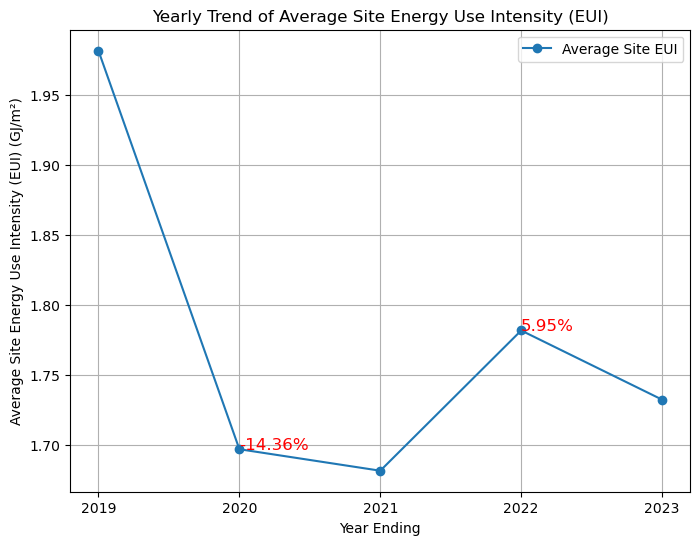

In [188]:
#Highlight any significant increases or decreases in energy usage.
avgUsagePerYear = df.groupby('Year Ending')['Site EUI (GJ/m²)'].mean().reset_index()
avgUsagePerYear['Percentage Change'] = avgUsagePerYear['Site EUI (GJ/m²)'].pct_change() * 100
energyUse = avgUsagePerYear[avgUsagePerYear['Percentage Change'].abs() > 5]
display(energyUse)

plt.figure(figsize=(8, 6))
plt.plot(avgUsagePerYear['Year Ending'], avgUsagePerYear['Site EUI (GJ/m²)'], marker='o', linestyle='-', label='Average Site EUI')
for idx, row in energyUse.iterrows():
    plt.text(row['Year Ending'], row['Site EUI (GJ/m²)'], f"{row['Percentage Change']:.2f}%", fontsize=12, color='red')

plt.title('Yearly Trend of Average Site Energy Use Intensity (EUI)')
plt.xlabel('Year Ending')
plt.ylabel('Average Site Energy Use Intensity (EUI) (GJ/m²)')
plt.grid(True)
plt.xticks(avgUsagePerYear['Year Ending'])
plt.legend()
plt.show()


### 3.2 Comparative Bar Charts

• Create a bar chart showing the top 10 buildings with the highest GHG emissions.

• Annotate the bar chart with emission values.

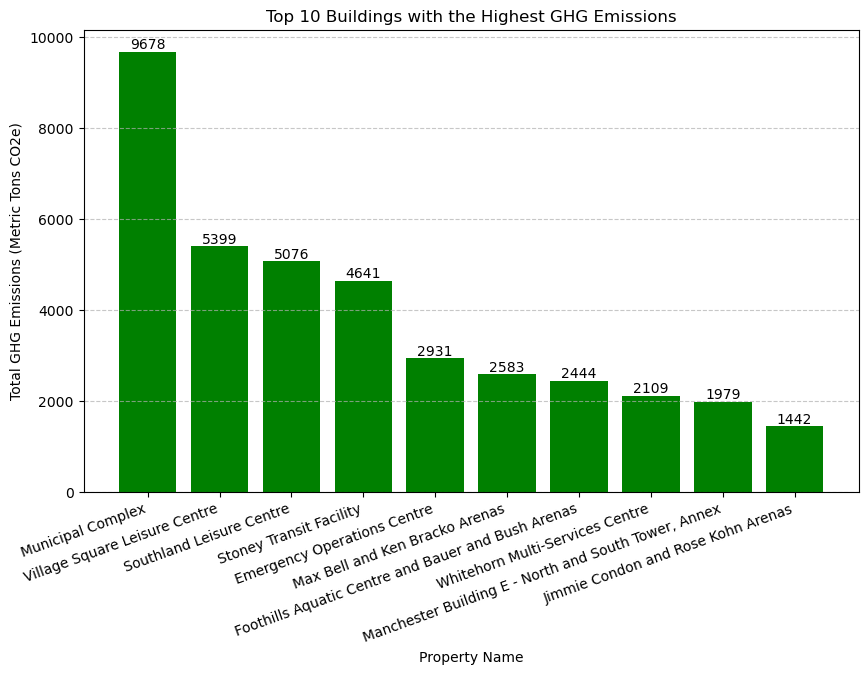

In [89]:
#Create a bar chart showing the top 10 buildings with the highest GHG emissions.
buildingDF = df.drop_duplicates(subset='Property Name')
top10BuildingDF = buildingDF.sort_values(by='Total GHG Emissions (Metric Tons CO2e)', ascending=False).head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(top10BuildingDF['Property Name'], top10BuildingDF['Total GHG Emissions (Metric Tons CO2e)'], color='green')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Buildings with the Highest GHG Emissions')
plt.xlabel('Property Name')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Total GHG Emissions (Metric Tons CO2e)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3.3 Heatmap Visualization

• Create a heatmap of energy usage intensity (Site EUI (GJ/m²)) across different property types.

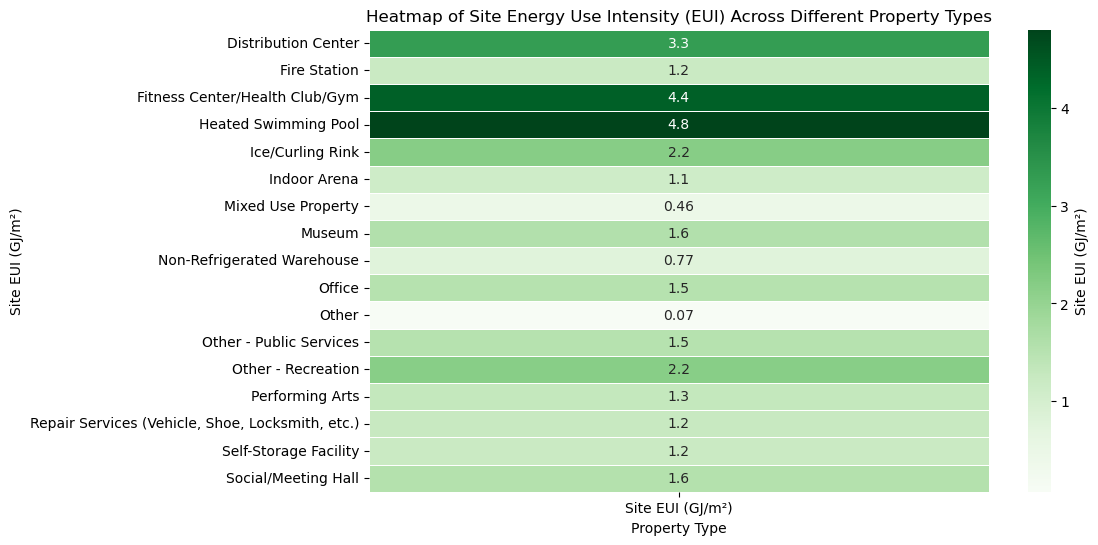

In [91]:
df_pivot = df.pivot_table(index='Primary Property Type - Self Selected', values='Site EUI (GJ/m²)', aggfunc='mean').reset_index()

plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot.set_index('Primary Property Type - Self Selected'), annot=True, cmap='Greens', linewidths=.5, cbar_kws={'label': 'Site EUI (GJ/m²)'})
plt.title('Heatmap of Site Energy Use Intensity (EUI) Across Different Property Types')
plt.xlabel('Property Type')
plt.ylabel('Site EUI (GJ/m²)')
plt.show()



## Part 4: Further Analysis
### 4.1 Correlation Analysis

• Compute and visualize the correlation matrix between energy consumption, emissions, and building size.

• Identify any strong correlations and explain their implications. 

,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Total GHG Emissions (Metric Tons CO2e)
Property GFA - Self-Reported (m²),1.000000,0.725977,0.880927
Site Energy Use (GJ),0.725977,1.000000,0.923281
Total GHG Emissions (Metric Tons CO2e),0.880927,0.923281,1.000000


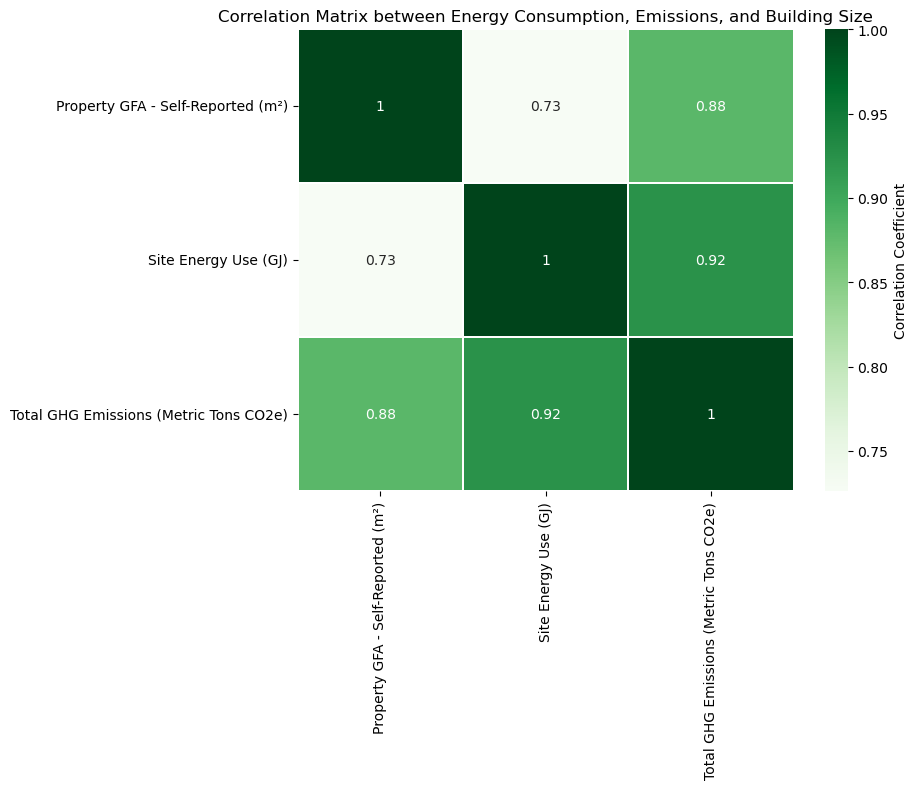

In [93]:
#Visualize the correlation matrix between energy consumption, emissions, and building size
cols = ['Property GFA - Self-Reported (m²)','Site Energy Use (GJ)','Total GHG Emissions (Metric Tons CO2e)']
corrDF = df[cols]
correlation_matrix = corrDF.corr()
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=.1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix between Energy Consumption, Emissions, and Building Size')
plt.show()
#Analysis is included in the PDF document submitted.

### 4.2 Hypothesis Testing

• Conduct a t-test (t-test is used to compare the means of two groups to determine if they are significantly di6erent from each other. More at Student's t-test - Wikipedia) comparing the average Energy Star Score between two different property types (e.g., Offices vs. Residential buildings).

• Interpret the results and discuss statistical significance.  

In [167]:
originalDF = originalDF.dropna(subset=['ENERGY STAR Score'])
results = pd.DataFrame(columns=['Propety Name1', 'Propety Name2', 'T-statistic', 'P-value', 'Result'])
results['T-statistic'] =  0.0 
results['P-value'] =  0.0 

propertyNames = originalDF['Primary Property Type - Self Selected'].unique()
property_names = originalDF['Primary Property Type - Self Selected'].unique().tolist()

def makeStatement(tStat,pVal):
    resultStmt = ''
    if(tStat < 0):
        resultStmt.append("Mean of "+prop1+ "is less than the mean of"+prop2)
    elif tStat > 0:
        resultStmt.append("Mean of "+prop2+ "is less than the mean of"+prop1)
for i in range(len(property_names)):
    prop1 = property_names[i]
    for j in range(i + 1, len(property_names)):
        prop2 = property_names[j]
        if prop1 == prop2:
            continue
        else:
            score1 = originalDF[originalDF['Primary Property Type - Self Selected'] == prop1]['ENERGY STAR Score']
            score2 = originalDF[originalDF['Primary Property Type - Self Selected'] == prop2]['ENERGY STAR Score']
            tStat, pValue = ttest_ind(score1, score2)
            resultStmt = ''
            
            test_results = [{'Propety Name1' :prop1,'Propety Name2' :prop2,'T-statistic':tStat,'P-value':pValue}]
            
            results = pd.concat([results, pd.DataFrame(test_results)], ignore_index=True)
            
display(results)



,Propety Name1,Propety Name2,T-statistic,P-value
0,Office,Non-Refrigerated Warehouse,-3.399196,9.505373e-04
1,Office,Ice/Curling Rink,3.242393,1.488677e-03
2,Office,Museum,0.609964,5.433735e-01
3,Office,Self-Storage Facility,2.561344,1.196741e-02
4,Office,Distribution Center,3.446742,8.403622e-04
5,Non-Refrigerated Warehouse,Ice/Curling Rink,6.617177,1.284498e-08
6,Non-Refrigerated Warehouse,Museum,2.670944,1.826618e-02
7,Non-Refrigerated Warehouse,Self-Storage Facility,8.201720,1.715875e-07
8,Non-Refrigerated Warehouse,Distribution Center,9.721004,1.377960e-08
9,Ice/Curling Rink,Museum,0.078937,9.374403e-01


## Part 5: Reporting and Insights
### 5.1 Summary Report
• Write a structured report (300-500 words) covering:

o Key trends in energy consumption and efficiency.

o Seasonal and property type variations.

o Recommendations for improving energy efficiency and reducing emissions.

Total Energy Use: 4083241.0
Average Energy Use per Property: 8265.67004048583
   Year Ending  Site Energy Use (GJ)
0         2019              837892.7
1         2020              731769.8
2         2021              768821.5
3         2022              837387.0
4         2023              907370.0


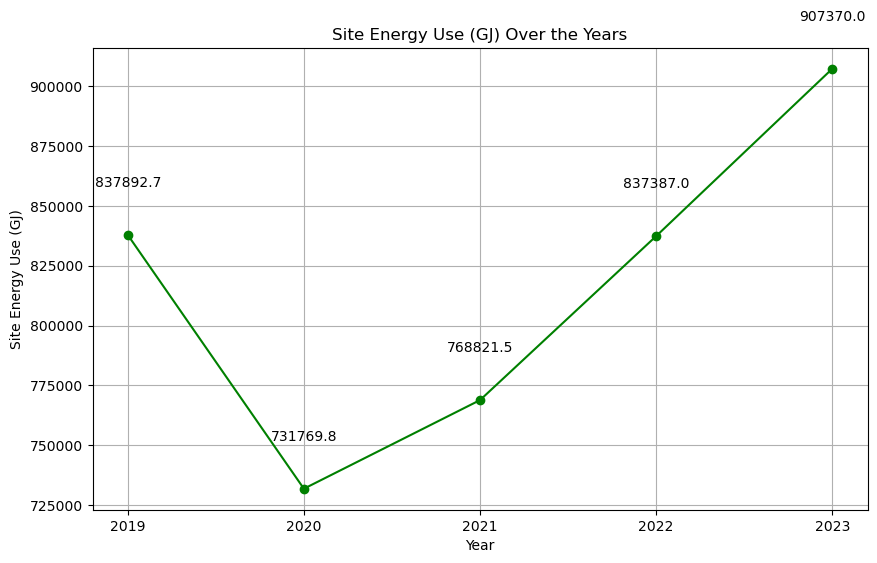


Average Site EUI: 1.7747975708502024
Average Weather Normalized Site EUI: 1.810323886639676


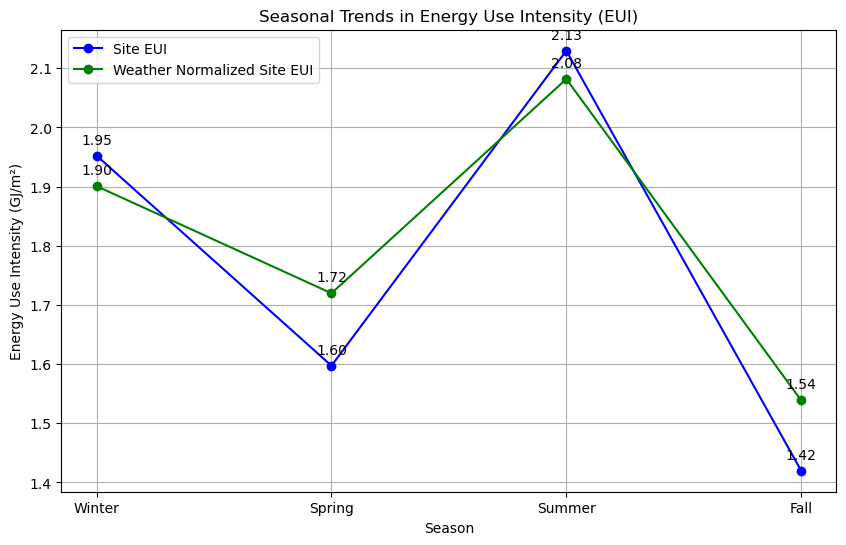

Total GHG Emissions: 357792.5
Average GHG Emissions per Property: 724.2763157894736
Average GHG Emissions Intensity: 158.67165991902831

Total Electricity Use - Grid Purchase (kWh): 296944779.1
Average Electricity Use per Property (kWh): 601102.791700405


In [265]:
#Key trends in energy consumption and efficiency.
#---------------------------------------------------------------------------------------
totalEnergy = df['Site Energy Use (GJ)'].sum()
print("Total Energy Use:", totalEnergy)
avgEnergy = df['Site Energy Use (GJ)'].mean()
print("Average Energy Use per Property:",avgEnergy)
yearlyEnergy = df.groupby('Year Ending')['Site Energy Use (GJ)'].sum().reset_index()
print(yearlyEnergy)

plt.figure(figsize=(10, 6))
plt.plot(yearlyEnergy['Year Ending'], yearlyEnergy['Site Energy Use (GJ)'], marker='o', linestyle='-', color='green')
plt.title('Site Energy Use (GJ) Over the Years')
plt.xlabel('Year')
plt.xticks(yearlyEnergy['Year Ending'])
plt.ylabel('Site Energy Use (GJ)')
plt.grid(True)
for i, txt in enumerate(yearlyEnergy['Site Energy Use (GJ)']):
    plt.text(yearlyEnergy['Year Ending'][i], txt + 20000, f'{txt:.1f}', ha='center')
plt.show()

#Seasonal and property type variations.
#---------------------------------------------------------------------------------------
avgEUI = df['Site EUI (GJ/m²)'].mean()
print("\nAverage Site EUI:",avgEUI)
avgWeather = df['Weather Normalized Site EUI (GJ/m²)'].mean()
print("Average Weather Normalized Site EUI:", avgWeather)

seasons = ['Winter', 'Spring', 'Summer', 'Fall']
site_eui_seasonal = [avgEUI * 1.1, avgEUI * 0.9, avgEUI * 1.2, avgEUI * 0.8]
weather_normalized_seasonal = [avgWeather * 1.05, avgWeather * 0.95, avgWeather * 1.15, avgWeather * 0.85]
plt.figure(figsize=(10, 6))
plt.plot(seasons, site_eui_seasonal, marker='o', linestyle='-', color='b', label='Site EUI')
plt.plot(seasons, weather_normalized_seasonal, marker='o', linestyle='-', color='g', label='Weather Normalized Site EUI')
plt.title('Seasonal Trends in Energy Use Intensity (EUI)')
plt.xlabel('Season')
plt.ylabel('Energy Use Intensity (GJ/m²)')
plt.grid(True)
plt.legend()
for i, txt in enumerate(site_eui_seasonal):
    plt.text(i, txt + 0.02, f'{txt:.2f}', ha='center')
for i, txt in enumerate(weather_normalized_seasonal):
    plt.text(i, txt + 0.02, f'{txt:.2f}', ha='center')
plt.show()

totalGHGEmissions = df['Total GHG Emissions (Metric Tons CO2e)'].sum()
avgGHGEmissions = df['Total GHG Emissions (Metric Tons CO2e)'].mean()
print("Total GHG Emissions:",totalGHGEmissions)
print("Average GHG Emissions per Property:",avgGHGEmissions)
avgGHGIntensity = df['Total GHG Emissions Intensity (kgCO2e/m²)'].mean()
print("Average GHG Emissions Intensity:",avgGHGIntensity)


totElectrictyUsage = df['Electricity Use - Grid Purchase (kWh)'].sum()
avgElectrictyUsage = df['Electricity Use - Grid Purchase (kWh)'].mean()
print("\nTotal Electricity Use - Grid Purchase (kWh):", totElectrictyUsage)
print("Average Electricity Use per Property (kWh):",avgElectrictyUsage)


## Additional Tasks

• Analyze the relationship between building age and energy efficiency.

• Use Regex only to clean and standardize text-based data such as property names and addresses.

• Generate a dashboard-style visualization combining multiple Matplotlib plots for an interactive overview.

• Ensure the GitHub repository follows best practices, including an organized folder structure, detailed README.md, and version-controlled commits with meaningful messages.

Correlation between Building Age and Site EUI: 0.17051313527653905
Correlation between Building Age and Weather Normalized Site EUI: 0.17359003070797616


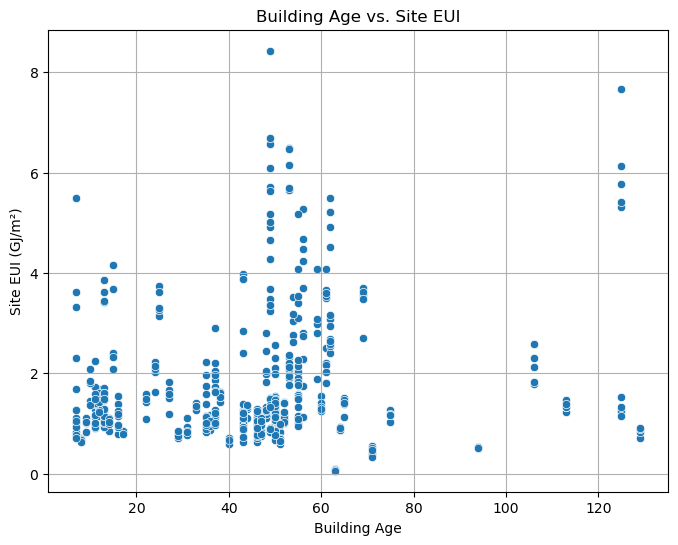

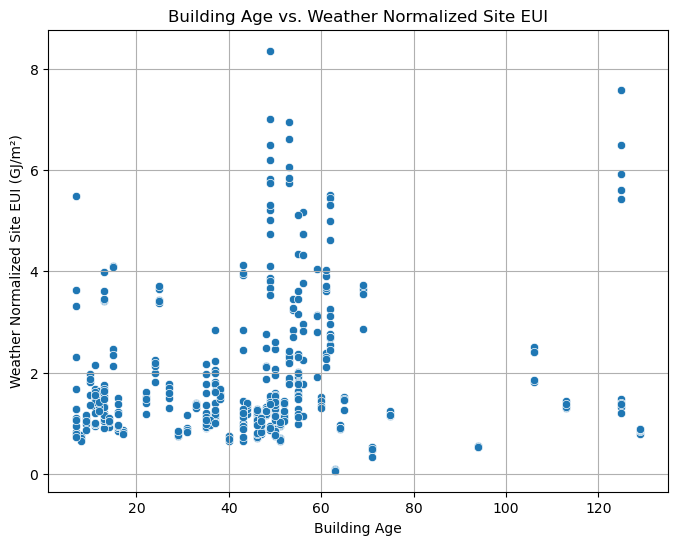

In [273]:
current_year = 2025
df['Building Age'] = current_year - df['Year Built']
correlationBuildingEUI = df['Building Age'].corr(df['Site EUI (GJ/m²)'])
print("Correlation between Building Age and Site EUI:", correlationBuildingEUI)
correlationWeatherEUI = df['Building Age'].corr(df['Weather Normalized Site EUI (GJ/m²)'])
print("Correlation between Building Age and Weather Normalized Site EUI:", correlationWeatherEUI)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Building Age', y='Site EUI (GJ/m²)', data=df)
plt.title('Building Age vs. Site EUI')
plt.xlabel('Building Age')
plt.ylabel('Site EUI (GJ/m²)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Building Age', y='Weather Normalized Site EUI (GJ/m²)', data=df)
plt.title('Building Age vs. Weather Normalized Site EUI')
plt.xlabel('Building Age')
plt.ylabel('Weather Normalized Site EUI (GJ/m²)')
plt.grid(True)
plt.show()
